# Using gradient descent with adam optimizer to predict circle function values

**Given**: We have very simple well known function for cricle (```x^2 + y^2 = 1```) 

**Goal**: Train model to predict coordinates ```y``` coordinate from given ```x```

**Challange**: For any given ```x``` function can return 1 or 2 values. For instance for ```x = 0```: ```y = {1,-1}```

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

# fix random seed for reproducibility
np.random.seed(7)


Using TensorFlow backend.


In [2]:
# Circle can be defined as x^2 + y^2 = 1, hence y = {sqrt(1 - x^2), -sqrt(1 - x^2)}
half_circle = lambda x: np.sqrt(1 - np.power(x, 2))

# Function generates list of list [x, solution1, solution2]
def gen_circle(x): 
    arr = []
    for v in x: 
        arr.extend([[v, half_circle(v), -half_circle(v)]])
    return np.array(arr)

# Function "flatters" list of [x, solution1, solution2] to [x1, solution1], [x2, solution2]
# which is useful for charts
def flat_circle(x): 
    return np.concatenate([x[:,[0, 1]], x[:,[0,2]]])


In [3]:
# Prepare our data (pick random samples)
ideal = gen_circle(np.arange(-1, 1, 0.005))
ideal_flat = flat_circle(ideal)
train = ideal[np.random.choice(len(ideal), size = 100)]

train_flat = flat_circle(train)
print("Shapes ideal: {}, ideal_flat: {}".format(ideal.shape, ideal_flat.shape))
print("Shapes train: {}, train_flat: {}".format(train.shape, train_flat.shape))


Shapes ideal: (400, 3), ideal_flat: (800, 2)
Shapes train: (100, 3), train_flat: (200, 2)


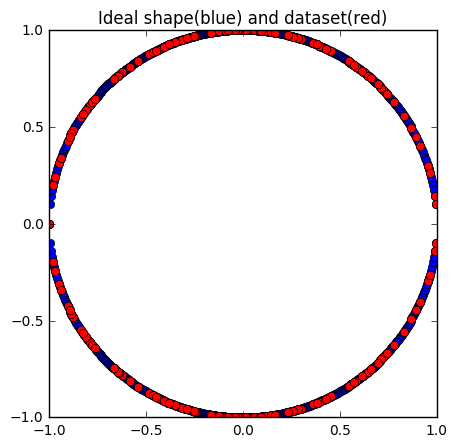

In [4]:
# Display chart
plt.figure(figsize=(5,5))
axes = plt.gca()
plt.title('Ideal shape(blue) and dataset(red)')
plt.plot(ideal_flat[:,0], ideal_flat[:,1], 'bo')
plt.plot(train_flat[:,0], train_flat[:,1], 'ro')
plt.show()


In [15]:
# Define model
model = Sequential()
model.add(Dense(128, activation='softsign', input_dim=1))
model.add(Dense(512, activation='softsign'))
model.add(Dense(2))

# Compile it (try to play around different optimizers)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Fit it
model.fit(train[:,0], train[:,[1,2]], nb_epoch=1000, batch_size=20, verbose=0)

# Evaluate the model
scores = model.evaluate(ideal[:,0], ideal[:,[1,2]])

print("\n%s: %.3f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.3f" % (model.metrics_names[1], scores[1]))


352/400 [=========================>....] - ETA: 0s
loss: 0.027%
mean_squared_error: 0.000


(160, 2) [-0.805       0.57107645]


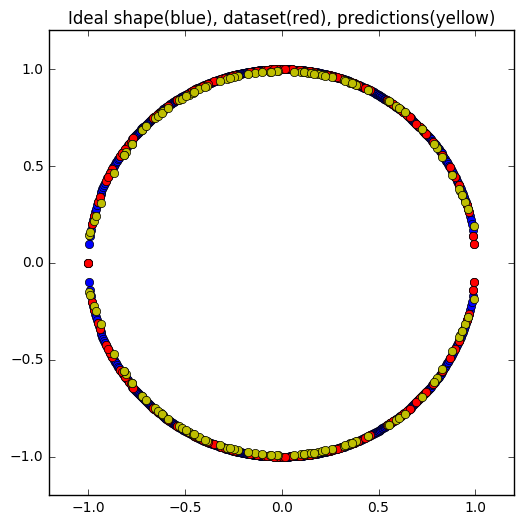

Shapes: sample (80, 3), sample_flat (160, 2)


In [18]:
# Predict and plot 
Xsample = np.random.choice(ideal[:,0], size=80)
Ysample = model.predict(Xsample)
sample = np.stack((Xsample, Ysample[:,0], Ysample[:,1]), axis=1)
sample_flat = flat_circle(sample)

# Display chart
plt.figure(figsize=(6,6))
plt.title('Ideal shape(blue), dataset(red), predictions(yellow)')
plt.plot(ideal_flat[:,0], ideal_flat[:,1], 'bo')
plt.plot(train_flat[:,0], train_flat[:,1], 'ro')
plt.plot(sample_flat[:,0], sample_flat[:,1], 'yo')
plt.ylim(-1.2, 1.2)
plt.xlim(-1.2, 1.2)
plt.show()

print("Shapes: sample {}, sample_flat {}".format(sample.shape, sample_flat.shape))
